In [14]:
import os
path = "C:/Users/mghn_/Desktop/Imarticus_Project"
os.chdir(path)
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [15]:
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [16]:
import pandas as pd
import numpy as np

data=pd.read_csv("TrainData_CSM.csv")

In [17]:
data.head(3)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,10.65,1,21,150119,10.0,2,24000.0,2,...,0.0,0.0,171.62,0.0,1.0,0,0.0,0.0,81008.5,0
1,2500.0,1,15.27,2,33,186161,0.5,2,30000.0,1,...,0.0,0.0,119.66,0.0,1.0,0,0.0,0.0,81008.5,1
2,2400.0,0,15.96,2,34,150119,10.0,2,12252.0,0,...,0.0,0.0,649.91,0.0,1.0,0,0.0,0.0,81008.5,0


In [10]:
#Recall score is used as a measure of performance
#Here, Logistic Regression and Decision Tree have the same value 0.85 while Random Forest has a value of 0.90
#The default cut off is 0.5
#Here Logistic Regression and Random Forest models are compared graphically



In [18]:

data.drop('issue_d',axis=1,inplace=True)

In [20]:
y=data['default_ind']
X=data.drop('default_ind',axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

0    441856
1     44303
Name: default_ind, dtype: int64


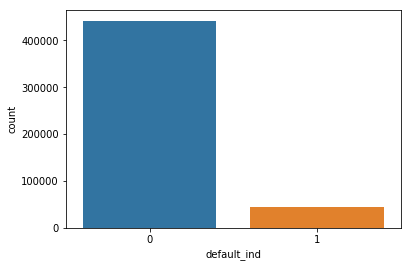

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(data['default_ind'].value_counts())
ax = sns.countplot(x='default_ind',data=data)
#Imbalanced class distribution is seen here

In [31]:
#Handling imbalanced classe

from imblearn.over_sampling import SMOTE
doOversampling = True

if doOversampling:
# Apply regular SMOTE - Synthetic Minority Over-sampling Technique
    sm = SMOTE(kind='regular')
    X_train, y_train, = sm.fit_sample(X_train, y_train)
    print('Training Set Shape after oversampling: ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train
    y_train = y_train 

Training Set Shape after oversampling:  (707196, 37) (707196,)
col_0       0       1
row_0                
0      353598       0
1           0  353598


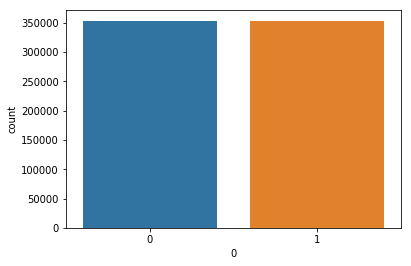

In [33]:
#To check the new distribution
check = pd.DataFrame(y_train)
#check.head(5)
import seaborn as sns
ax = sns.countplot(x=0, data=check)

In [34]:
#Building Logistic model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)


In [37]:
metrics=pd.DataFrame(index=["Accuracy","Precision","Recall"],columns=["Logistic Regression","Random Forest"])

In [87]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,classification_report
#Evaluating the model
predictions=logmodel.predict(X_test)
metrics.loc["Accuracy","Logistic Regression"]=accuracy_score(y_test,predictions)
metrics.loc["Precision","Logistic Regression"]=precision_score(y_test,predictions)
metrics.loc["Recall","Logistic Regression"]=recall_score(y_test,predictions)

In [48]:
#Print Confusion Matrix
print(confusion_matrix(y_test,predictions))

[[87352   906]
 [  518  8456]]


In [41]:
#RandomForest begins
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [42]:
#Evaluating the model
y_pred=rf.predict(X_test)
metrics.loc["Accuracy","Random Forest"]=accuracy_score(y_test,y_pred)
metrics.loc["Precision","Random Forest"]=precision_score(y_test,y_pred)
metrics.loc["Recall","Random Forest"]=recall_score(y_test,y_pred)


In [49]:
print(confusion_matrix(y_test,y_pred))

[[88047   211]
 [  911  8063]]


In [45]:
print(metrics*100)

          Logistic Regression Random Forest
Accuracy              98.5355       98.8461
Precision             90.3226       97.4498
Recall                94.2278       89.8485


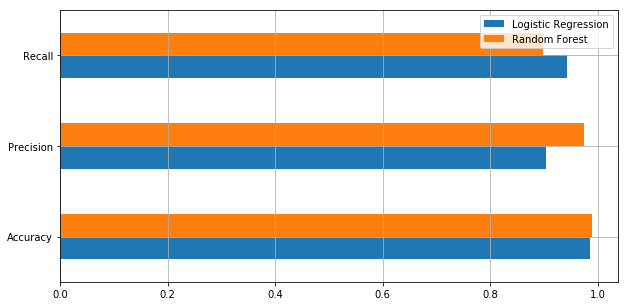

In [57]:
#plotting the graph
import matplotlib.pyplot as plt
fx,ax=plt.subplots(figsize=(10,5))
metrics.plot(kind="barh",ax=ax)
ax.grid()

In [61]:
from sklearn.metrics import precision_recall_curve
precision_lr,recall_lr,threshold_lr=precision_recall_curve(y_test,logmodel.predict_proba(X_test)[:,1])
precision_rf,recall_rf,threshold_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

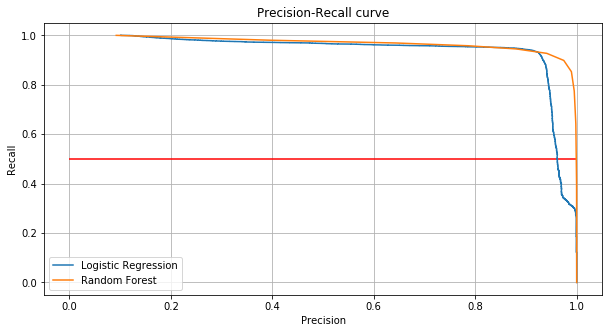

In [65]:
#plotting the precision recall curve
fx,ax=plt.subplots(figsize=(10,5))
ax.plot(precision_lr,recall_lr,label="Logistic Regression")
ax.plot(precision_rf,recall_rf,label="Random Forest")
ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_title("Precision-Recall curve")
ax.hlines(y=0.5,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

In [76]:
#Here Random Forest is a better model than Logistic regression given a particular level of recall
#Adjusting Logistic Regression to have a similar value as Random Forest


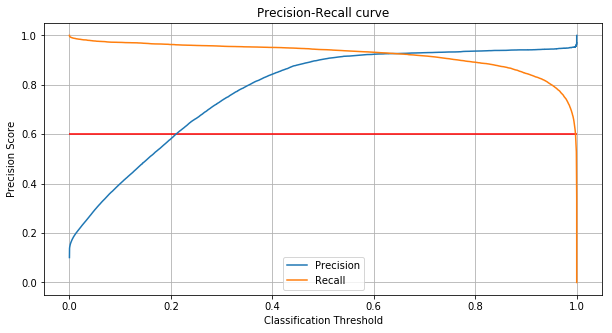

In [80]:
#Looking at Threshold for logistic Regression
fx,ax=plt.subplots(figsize=(10,5))
ax.plot(threshold_lr,precision_lr[1:],label="Precision")
ax.plot(threshold_lr,recall_lr[1:],label="Recall")
ax.set_xlabel("Classification Threshold")
ax.set_ylabel("Precision Score")
ax.set_title("Precision-Recall curve")
ax.hlines(y=0.6,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

In [83]:
#Classfication threshold of 0.2
y_pred_proba=logmodel.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba>=0.2).astype(int)
print("Precision is",precision_score(y_test,y_pred_test)*100)
print("Recall is",recall_score(y_test,y_pred_test)*100)

Precision is 58.12310797174571
Recall is 96.27813683975931


In [85]:
confusion_matrix(y_test,y_pred_test)

array([[82033,  6225],
       [  334,  8640]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     88258
          1       0.58      0.96      0.72      8974

avg / total       0.96      0.93      0.94     97232



In [96]:
y_pred_proba=logmodel.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba>=0.19).astype(int)
print("Precision is",precision_score(y_test,y_pred_test)*100)
print("Recall is",recall_score(y_test,y_pred_test)*100)

Precision is 56.33179243440328
Recall is 96.41185647425897


In [97]:
y_pred_proba=logmodel.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba>=0.15).astype(int)
print("Precision is",precision_score(y_test,y_pred_test)*100)
print("Recall is",recall_score(y_test,y_pred_test)*100)

Precision is 49.209497364991215
Recall is 96.76844216625808


In [98]:
y_pred_proba=logmodel.predict_proba(X_test)[:,1]
y_pred_test=(y_pred_proba>=0.10).astype(int)
print("Precision is",precision_score(y_test,y_pred_test)*100)
print("Recall is",recall_score(y_test,y_pred_test)*100)

Precision is 39.96333638863428
Recall is 97.16960106975708


In [120]:
#Test data check
testdata=pd.read_csv("TestData_CSM.csv")

In [121]:
testdata.drop('issue_d',axis=1,inplace=True)
y=testdata['default_ind']
X=testdata.drop('default_ind',axis=1)

In [122]:
y_pred_proba=logmodel.predict_proba(X)[:,1]
y_pred_test=(y_pred_proba>=0.10).astype(int)
print("Precision is",precision_score(y,y_pred_test)*100)
print("Recall is",recall_score(y,y_pred_test)*100)

Precision is 2.857993450431676
Recall is 88.72458410351202


In [123]:
y_pred_proba=logmodel.predict_proba(X)[:,1]
y_pred_test=(y_pred_proba>=0.15).astype(int)
print("Precision is",precision_score(y,y_pred_test)*100)
print("Recall is",recall_score(y,y_pred_test)*100)

Precision is 4.198464839516005
Recall is 87.7079482439926


In [126]:
y_pred_proba=logmodel.predict_proba(X)[:,1]
y_pred_test=(y_pred_proba>=0.19).astype(int)
print("Precision is",precision_score(y,y_pred_test)*100)
print("Recall is",recall_score(y,y_pred_test)*100)

Precision is 5.741451819345402
Recall is 87.06099815157117
